# Ridership Analysis

In [1]:
!pip install pandas fuzzywuzzy rapidfuzz dask pyspark --quiet

# Importing and Preprocessing Datasets

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mta-combined/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv
/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv
/kaggle/input/mta-combined/MTA_Subway_Turnstile_Usage_Data__2022.csv
/kaggle/input/mta-combined/MTA_Subway_Major_Incidents__Beginning_2020.csv
/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv
/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv
/kaggle/input/mta-combined/MTA_Key_Performance_Indicators__2008-2021.csv
/kaggle/input/mta-combined/MTA_Daily_Ridership_Data__Beginning_2020.csv
/kaggle/input/mta-combined/MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv
/kaggle/input/mta-combined/MTA_Subway_Stations.csv
/kaggle/input/mta-combined/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv
/kaggle/input/mta-combined/MTA_Subway_and_Bus_Lost_Time_Accidents__Beginning_2021.csv
/kaggle/input/mta-combined/MTA_Customer_Feedback_Data__2014-2019.csv
/kaggle/input/ridership-n

In [3]:
import pandas as pd
import random

# Input and output file paths
input_file = "/kaggle/input/mta-combined/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"  # Replace with your file path
output_file = "MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"

# Parameters
sample_fraction = 0.05  # 5%
chunksize = 1000000  # Number of rows to process at a time
random_seed = 42  # Fixed random seed for reproducibility

# Open the output file in write mode to save the sampled data
try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  # Set low_memory to False
            # Randomly sample rows based on the fraction
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            # Append sampled rows to the output file
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  # Add header only once
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv


In [4]:
import pandas as pd
import random

# Input and output file paths
input_file = "/kaggle/input/mta-combined/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"  # Replace with your file path
output_file = "MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"

# Parameters
sample_fraction = 0.05  # 5%
chunksize = 1000000  # Number of rows to process at a time
random_seed = 42  # Fixed random seed for reproducibility

# Open the output file in write mode to save the sampled data
try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  # Set low_memory to False
            # Randomly sample rows based on the fraction
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            # Append sampled rows to the output file
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  # Add header only once
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv


In [5]:
import pandas as pd
import os

def load_csvs_and_sample(csv_list, size_limit_gb=1.5, sample_fraction=0.05):
    """
    Load CSV files into dataframes and sample large files to bring their size below the specified limit.

    Args:
    - csv_list (list): List of CSV file paths to load.
    - size_limit_gb (float): Size limit in GB for each CSV file.
    - sample_fraction (float): Fraction to sample for files exceeding the size limit.

    Returns:
    - dict: Dictionary containing dataframe names (keys) and dataframes (values).
    """
    size_limit_bytes = size_limit_gb * (1024 ** 3)  # Convert GB to bytes
    dataframes = {}  # To store the resulting dataframes

    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"File {csv_path} does not exist.")
            continue

        # Get file size in bytes
        file_size_bytes = os.path.getsize(csv_path)

        print(f"Processing {os.path.basename(csv_path)}: Size = {file_size_bytes / (1024 ** 3):.2f} GB")

        # Load the CSV, sampling if necessary
        if file_size_bytes > size_limit_bytes:
            print(f"{os.path.basename(csv_path)} exceeds size limit. Loading and sampling...")
            df = pd.read_csv(csv_path).sample(frac=sample_fraction, random_state=42)
        else:
            print(f"{os.path.basename(csv_path)} is within size limit. Loading...")
            df = pd.read_csv(csv_path)

        # Add the dataframe to the dictionary with the name of the CSV (without extension)
        dataframes[os.path.splitext(os.path.basename(csv_path))[0]] = df

    return dataframes

# List of CSV files with corrected paths
csv_files = [
    "/kaggle/input/mta-combined/MTA_Customer_Feedback_Data__2014-2019.csv",
    "/kaggle/input/ridership-new/vxuj-8kew_version_796.csv",
    "/kaggle/input/mta-combined/MTA_Key_Performance_Indicators__2008-2021.csv",
    "/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv",
    "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv",
    "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Major_Incidents__Beginning_2020.csv",
    "/kaggle/working/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Turnstile_Usage_Data__2022.csv",
    "/kaggle/input/mta-combined/MTA_Subway_and_Bus_Lost_Time_Accidents__Beginning_2021.csv"
    ""
]

# Load the dataframes
dataframes = load_csvs_and_sample(csv_files)

# Access dataframes by their names
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")


Processing MTA_Customer_Feedback_Data__2014-2019.csv: Size = 0.05 GB
MTA_Customer_Feedback_Data__2014-2019.csv is within size limit. Loading...
Processing vxuj-8kew_version_796.csv: Size = 0.00 GB
vxuj-8kew_version_796.csv is within size limit. Loading...
Processing MTA_Key_Performance_Indicators__2008-2021.csv: Size = 0.00 GB
MTA_Key_Performance_Indicators__2008-2021.csv is within size limit. Loading...
Processing MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv: Size = 0.00 GB
MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv is within size limit. Loading...
Processing MTA_Service_Alerts__Beginning_April_2020.csv: Size = 0.09 GB
MTA_Service_Alerts__Beginning_April_2020.csv is within size limit. Loading...


/tmp/ipykernel_23/3903561231.py:35: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Processing MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv: Size = 0.00 GB
MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv is within size limit. Loading...
Processing MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv: Size = 0.72 GB
MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv is within size limit. Loading...
Processing MTA_Subway_Major_Incidents__Beginning_2020.csv: Size = 0.00 GB
MTA_Subway_Major_Incidents__Beginning_2020.csv is within size limit. Loading...
Processing MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv: Size = 0.70 GB
MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv is within size limit. Loading...
Processing MTA_Subway_Stations.csv: Size = 0.00 GB
MTA_Subway_Stations.csv is within size limit. Loading...
Processing MTA_Subway_Stations_and_Complexes.csv: Size = 0.00 GB
MTA_Subway_Stations_and_Complexes.csv is within size limit. Loading...
Processing MTA_Subway_Turnstile_Usage_Data__2022.csv: Size = 0.71 GB
MTA_Subway_

# Exploratory Data Analysis

In [ ]:
# Example: Check summary statistics for each DataFrame
for name, df in dataframes.items():
    print(f"Summary statistics for {name}:\n")
    print(df.describe(include='all'), "\n")

In [6]:
dataframes["MTA_Subway_Hourly_Ridership__Beginning_July_2020"].head()


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,04/02/2024 09:00:00 AM,subway,429,"Freeman St (2,5)",Bronx,metrocard,Metrocard - Unlimited 7-Day,13,0,40.829994,-73.891870,POINT (-73.89187 40.829994)
1,03/27/2024 11:00:00 PM,subway,271,"Steinway St (M,R)",Queens,metrocard,Metrocard - Unlimited 7-Day,12,0,40.756878,-73.920740,POINT (-73.92074 40.756878)
2,03/07/2024 04:00:00 PM,subway,268,"65 St (M,R)",Queens,metrocard,Metrocard - Seniors & Disability,2,0,40.749670,-73.898450,POINT (-73.89845 40.74967)
3,03/20/2024 05:00:00 AM,subway,118,3 Av (L),Manhattan,omny,OMNY - Full Fare,4,1,40.732850,-73.986120,POINT (-73.98612 40.73285)
4,03/27/2024 07:00:00 PM,subway,306,125 St (1),Manhattan,metrocard,Metrocard - Unlimited 7-Day,14,0,40.815582,-73.958374,POINT (-73.958374 40.815582)


In [14]:
# Schema mapping for all dataframes

for name, df in dataframes.items():
    print(f"Dataset: {name}")
    for col, dtype in df.dtypes.items():
        print(f"  └─ {col}: {dtype}")
    print("-" * 60)

Dataset: MTA_Customer_Feedback_Data__2014-2019
  └─ Agency: object
  └─ Commendation or Complaint: object
  └─ Subject Matter: object
  └─ Subject Detail: object
  └─ Issue Detail: object
  └─ Year: int64
  └─ Quarter: int64
  └─ Branch/Line/Route: object
------------------------------------------------------------
Dataset: vxuj-8kew_version_796
  └─ staten_island_railway_of_comparable_pre_pandemic_day: float64
  └─ staten_island_railway_total_estimated_ridership: int64
  └─ itsuid: object
  └─ buses_of_comparable_pre_pandemic_day: float64
  └─ buses_total_estimated_ridersip: int64
  └─ subways_of_comparable_pre_pandemic_day: float64
  └─ subways_total_estimated_ridership: int64
  └─ date: object
  └─ access_a_ride_total_scheduled_trips: int64
  └─ metro_north_of_comparable_pre_pandemic_day: float64
  └─ metro_north_total_estimated_ridership: int64
  └─ lirr_of_comparable_pre_pandemic_day: float64
  └─ lirr_total_estimated_ridership: int64
  └─ bridges_and_tunnels_of_comparable_pre_pan

In [15]:
# Ensure hourly ridership data is loaded
if 'MTA_Subway_Hourly_Ridership__Beginning_July_2020' in dataframes:
    hourly_ridership = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

    # Convert 'transit_timestamp' to datetime if not already done
    hourly_ridership['transit_timestamp'] = pd.to_datetime(hourly_ridership['transit_timestamp'])

    # Extract date from timestamp
    hourly_ridership['Date'] = hourly_ridership['transit_timestamp'].dt.date

    # Aggregate hourly ridership into daily totals
    daily_from_hourly = hourly_ridership.groupby('Date', as_index=False).agg({'ridership': 'sum'})

    # Rename columns for clarity
    daily_from_hourly.rename(columns={'ridership': 'Hourly Aggregated Ridership'}, inplace=True)

    print("Hourly data successfully aggregated into daily data.")
else:
    print("Hourly ridership data is not loaded.")


Hourly data successfully aggregated into daily data.


In [18]:
# 1) Convert the Date column to real datetimes
daily_from_hourly['Date'] = pd.to_datetime(daily_from_hourly['Date'])

# 2) (Optional) verify
print(daily_from_hourly['Date'].dtype)

datetime64[ns]


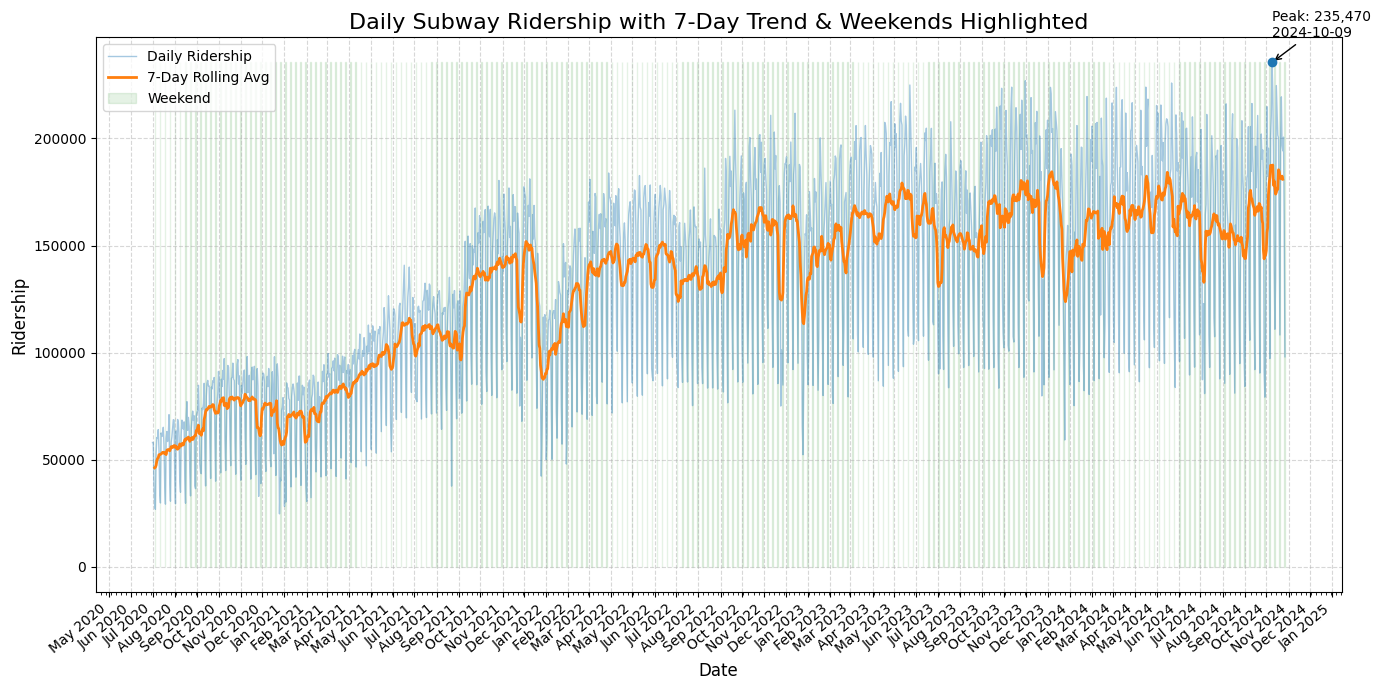

In [25]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Compute a 7‑day rolling mean
daily_from_hourly['7d_Rolling'] = (
    daily_from_hourly['Hourly Aggregated Ridership']
    .rolling(window=7, center=True)
    .mean()
)

# Identify the peak day
peak_idx = daily_from_hourly['Hourly Aggregated Ridership'].idxmax()
peak_date = daily_from_hourly.loc[peak_idx, 'Date']
peak_value = daily_from_hourly.loc[peak_idx, 'Hourly Aggregated Ridership']

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot raw and rolling
ax.plot(daily_from_hourly['Date'],
        daily_from_hourly['Hourly Aggregated Ridership'],
        alpha=0.4,
        label='Daily Ridership',
        linewidth=1)
ax.plot(daily_from_hourly['Date'],
        daily_from_hourly['7d_Rolling'],
        label='7‑Day Rolling Avg',
        linewidth=2)

# Highlight weekends
# Assumes Date is a datetime64 and sorted
is_weekend = daily_from_hourly['Date'].dt.weekday >= 5
ax.fill_between(daily_from_hourly['Date'],
                0,
                daily_from_hourly['Hourly Aggregated Ridership'].max(),
                where=is_weekend,
                color='green',
                alpha=0.1,
                label='Weekend')

# Annotate the single peak
ax.scatter([peak_date], [peak_value], zorder=5)
ax.annotate(
    f'Peak: {peak_value:,}\n{peak_date.date()}',
    xy=(peak_date, peak_value),
    xytext=(peak_date, peak_value * 1.05),
    arrowprops=dict(arrowstyle='->', lw=1)
)

# Formatting dates: months as majors, weeks as minors
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))

# Labels, grid, legend
ax.set_title("Daily Subway Ridership with 7‑Day Trend & Weekends Highlighted", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Ridership", fontsize=12)
ax.grid(which='major', linestyle='--', alpha=0.5)
ax.legend()

# Tidy up and rotate
fig.autofmt_xdate(rotation=40)
plt.tight_layout()
plt.show()





In [35]:
# Ensure the datasets are loaded
if 'vxuj-8kew_version_796' in dataframes and 'MTA_Subway_Hourly_Ridership__Beginning_July_2020' in dataframes:
    # Load the datasets
    daily_ridership = dataframes['vxuj-8kew_version_796']
    daily_from_hourly = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

    # Ensure 'Date' column in daily_ridership is in datetime format
    daily_ridership['Date'] = pd.to_datetime(daily_ridership['date'])

    # Ensure 'transit_timestamp' in daily_from_hourly is in datetime format
    daily_from_hourly['transit_timestamp'] = pd.to_datetime(daily_from_hourly['transit_timestamp'])
    # Extract only the date part
    daily_from_hourly['Date'] = daily_from_hourly['transit_timestamp'].dt.date
    # Convert the extracted date back to datetime for consistency
    daily_from_hourly['Date'] = pd.to_datetime(daily_from_hourly['Date'])

    # Summarize hourly data to daily data
    daily_from_hourly = daily_from_hourly.groupby('Date', as_index=False)['ridership'].sum()
    daily_from_hourly.rename(columns={'ridership': 'Hourly Aggregated Ridership'}, inplace=True)

    # Now perform the merge
    daily_combined = pd.merge(daily_ridership, daily_from_hourly, on='Date', how='outer')
    print("Datasets successfully combined!")
else:
    print("Required datasets are not loaded.")


Datasets successfully combined!


In [36]:
# Ensure 'Date' column in both datasets is in datetime format
daily_ridership['Date'] = pd.to_datetime(daily_ridership['Date'])
daily_from_hourly['Date'] = pd.to_datetime(daily_from_hourly['Date'])

# Now perform the merge
daily_combined = pd.merge(daily_ridership, daily_from_hourly, on='Date', how='outer')
print("Datasets successfully combined!")



Datasets successfully combined!


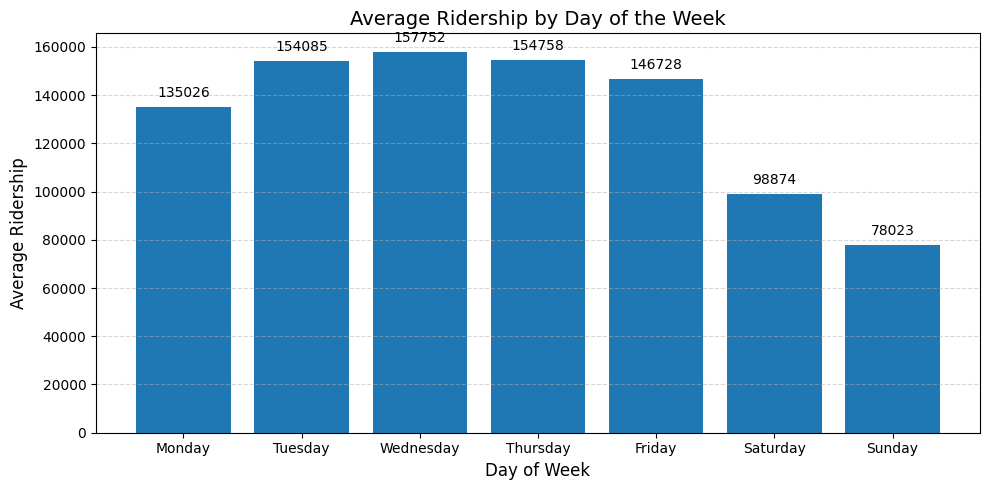

In [38]:
import matplotlib.pyplot as plt

# This cell assumes `daily_combined` exists in your notebook environment.
# If it's not present, it will prompt you rather than error out.
if 'daily_combined' in globals():
    # Ensure Date is datetime and DayOfWeek is ordered
    daily_combined['Date'] = pd.to_datetime(daily_combined['Date'])
    daily_combined['DayOfWeek'] = daily_combined['Date'].dt.day_name()
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_trends = (
        daily_combined
        .groupby('DayOfWeek')['Hourly Aggregated Ridership']
        .mean()
        .reindex(order)
    )

    # Plot with picker enabled for interactivity
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(weekday_trends.index, weekday_trends.values, picker=True)

    # Titles and labels
    ax.set_title('Average Ridership by Day of the Week', fontsize=14)
    ax.set_xlabel('Day of Week', fontsize=12)
    ax.set_ylabel('Average Ridership', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

    # Define click event to toggle highlight
    def on_pick(event):
        bar = event.artist
        current_lw = bar.get_linewidth()
        bar.set_linewidth(3 if current_lw == 0.8 else 0.8)
        fig.canvas.draw()

    fig.canvas.mpl_connect('pick_event', on_pick)

    plt.tight_layout()
    plt.show()
else:
    print("Please run this cell in your notebook where `daily_combined` is defined.")



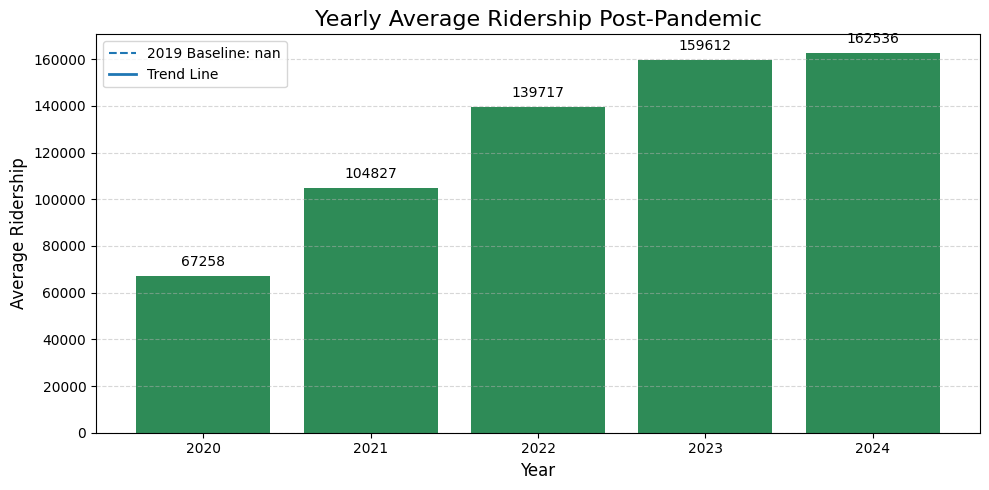

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Extract year and compute yearly averages
daily_combined['Year'] = daily_combined['Date'].dt.year
post_pandemic = daily_combined[daily_combined['Year'] >= 2020]
post_pandemic_yearly = post_pandemic.groupby('Year')['Hourly Aggregated Ridership'].mean()

# 2. Compute 2019 baseline for reference (pre‑pandemic)
baseline = daily_combined[daily_combined['Year'] == 2019]['Hourly Aggregated Ridership'].mean()

# 3. Plot bars with picker for interactivity
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(
    post_pandemic_yearly.index.astype(str),
    post_pandemic_yearly.values,
    color='seagreen',
    picker=True
)

# 4. Draw baseline line
ax.axhline(baseline, linestyle='--', linewidth=1.5, label=f'2019 Baseline: {baseline:.0f}')

# 5. Add a simple linear trend line
years = post_pandemic_yearly.index.values
y = post_pandemic_yearly.values
coef = np.polyfit(years, y, deg=1)
trend = np.poly1d(coef)(years)
ax.plot(years.astype(str), trend, linestyle='-', linewidth=2, label='Trend Line')

# 6. Annotate each bar with its value
for bar in bars:
    h = bar.get_height()
    ax.annotate(f'{h:.0f}',
                xy=(bar.get_x() + bar.get_width()/2, h),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom')

# 7. Click event to toggle bar edge highlight
def on_pick(event):
    bar = event.artist
    lw = bar.get_linewidth()
    bar.set_linewidth(3 if lw == 0.8 else 0.8)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)

# 8. Labels, title, grid, legend
ax.set_title('Yearly Average Ridership Post‑Pandemic', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Ridership', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()



In [44]:
# Ensure the dataset path is correct
service_alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020']

# Convert 'Date' column to datetime
service_alerts['Date'] = pd.to_datetime(service_alerts['Date'])

# Check if the dataset loaded correctly
service_alerts.head(5)


,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description
0,345264,167130,0,2024-08-26 11:33:00,NYCT Subway,delays,6,Northbound 6 trains are delayed while we addre...,NaN
1,345139,167055,0,2024-08-25 22:47:00,NYCT Subway,delays,A,Southbound A trains are delayed while FDNY res...,NaN
2,344558,166767,0,2024-08-23 14:44:00,BT,planned-work,Throgs Neck Bridge,Throgs Neck Bridge: Planned work; Bronx bound ...,NaN
3,342848,165879,0,2024-08-18 11:12:00,BT,delays,Marine Parkway Bridge,MPB: Vehicle collision; Brooklyn bound blockin...,NaN
4,342668,165788,0,2024-08-17 12:11:00,NYCT Subway,delays,N,Northbound N trains are delayed while we addre...,NaN


In [45]:
# Group service_alerts by Date to create service_alerts_per_day
service_alerts_per_day = service_alerts.groupby('Date').size().reset_index(name='Alert Count')


In [51]:
import pandas as pd

# Structured summary function
def summarize_dataframe(df, key_cols=None):
    print(f"DataFrame: {df.name if hasattr(df, 'name') else 'service_alerts'}")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    
    # 1) Schema table
    schema = pd.DataFrame({
        'Column': df.columns,
        'Dtype': df.dtypes.values
    })
    display(schema.style.set_caption("Columns & Data Types"))
    
    # 2) First 5 rows
    display(df.head().style.set_caption("First 5 Rows"))
    
    # 3) Unique value counts for key columns
    if key_cols:
        for col in key_cols:
            counts = df[col].value_counts().rename_axis(col).reset_index(name='Count')
            display(counts.style.set_caption(f"Unique Values in '{col}'"))
            
# Use the function
summarize_dataframe(service_alerts, key_cols=['Status Label', 'Agency'])


DataFrame: service_alerts
Shape: 351631 rows × 9 columns



,Column,Dtype
0,Alert ID,int64
1,Event ID,int64
2,Update Number,int64
3,Date,datetime64[ns]
4,Agency,object
5,Status Label,object
6,Affected,object
7,Header,object
8,Description,object


,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description
0,345264,167130,0,2024-08-26 11:33:00,NYCT Subway,delays,6,Northbound 6 trains are delayed while we address a door problem on a train at Canal St.,nan
1,345139,167055,0,2024-08-25 22:47:00,NYCT Subway,delays,A,Southbound A trains are delayed while FDNY responds to a track fire at Grant Av.,nan
2,344558,166767,0,2024-08-23 14:44:00,BT,planned-work,Throgs Neck Bridge,Throgs Neck Bridge: Planned work; Bronx bound one lane closed,nan
3,342848,165879,0,2024-08-18 11:12:00,BT,delays,Marine Parkway Bridge,MPB: Vehicle collision; Brooklyn bound blocking one lane,nan
4,342668,165788,0,2024-08-17 12:11:00,NYCT Subway,delays,N,Northbound N trains are delayed while we address a signal problem at New Utrecht Av.,nan


,Status Label,Count
0,delays,173711
1,some-delays,48120
2,buses-detoured,16901
3,weekday-service,16850
4,essential-service,8219
5,local-to-express,7958
6,part-suspended,7707
7,cancellations,7356
8,no-scheduled-service,6318
9,service-change,6011


,Agency,Count
0,NYCT Subway,203937
1,NYCT Bus,71167
2,LIRR,49682
3,MNR,22215
4,BT,4630


In [52]:
# Ensure the dataset is loaded
if 'MTA_Service_Alerts__Beginning_April_2020' in dataframes:
    service_alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020']

    # Count alerts by status label
    alert_counts_by_status = service_alerts['Status Label'].value_counts()

    # Create DataFrame from the status label counts
    status_counts = pd.Series(alert_counts_by_status)
    top_5_alerts = status_counts.nlargest(5)

    # Create a DataFrame with the top 5 alerts
    df = pd.DataFrame({
        'Status Label': top_5_alerts.index,
        'Count': top_5_alerts.values
    })

    # Display the table with formatting
    print(df.to_markdown(index=False))
else:
    print("The 'MTA_Service_Alerts__Beginning_April_2020' dataset is not loaded.")


| Status Label      |   Count |
|:------------------|--------:|
| delays            |  173711 |
| some-delays       |   48120 |
| buses-detoured    |   16901 |
| weekday-service   |   16850 |
| essential-service |    8219 |


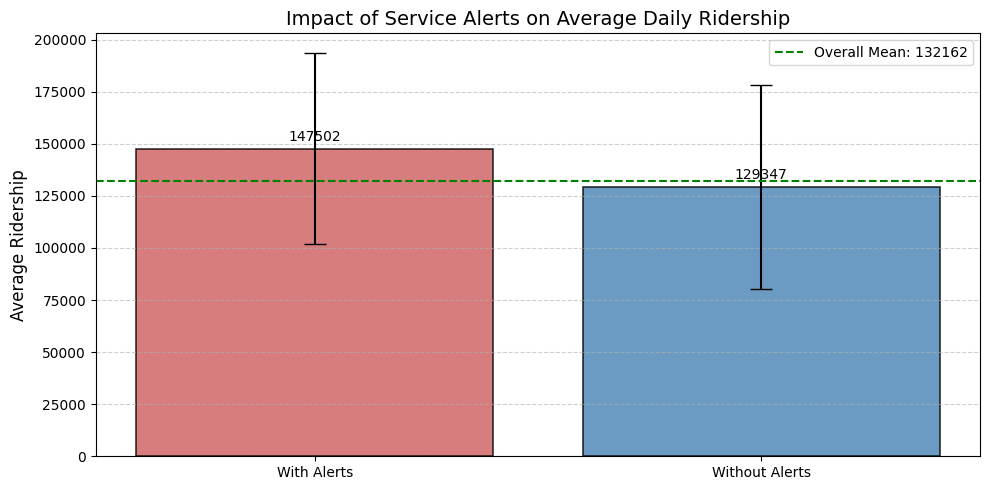

In [59]:
import matplotlib.pyplot as plt

# Compute the two group means & standard deviations explicitly
avg_with  = daily_with_alerts[daily_with_alerts['Alert Count'] > 0]['Hourly Aggregated Ridership'].mean()
std_with  = daily_with_alerts[daily_with_alerts['Alert Count'] > 0]['Hourly Aggregated Ridership'].std()
avg_without  = daily_with_alerts[daily_with_alerts['Alert Count'] == 0]['Hourly Aggregated Ridership'].mean()
std_without  = daily_with_alerts[daily_with_alerts['Alert Count'] == 0]['Hourly Aggregated Ridership'].std()

labels = ['With Alerts', 'Without Alerts']
means  = [avg_with, avg_without]
stds   = [std_with, std_without]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(
    labels,
    means,
    yerr=stds,
    capsize=8,
    color=['indianred', 'steelblue'],
    edgecolor='black',
    linewidth=1.2,
    alpha=0.8
)

# Annotate each bar with its mean
for bar, m in zip(bars, means):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        m + max(stds)*0.05,
        f'{m:.0f}',
        ha='center', va='bottom'
    )

# Overall mean line
overall = daily_with_alerts['Hourly Aggregated Ridership'].mean()
ax.axhline(overall, color='green', linestyle='--', linewidth=1.5,
           label=f'Overall Mean: {overall:.0f}')

ax.set_title('Impact of Service Alerts on Average Daily Ridership', fontsize=14)
ax.set_ylabel('Average Ridership', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()


In [60]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, dayofweek, avg, to_date

# Initialize Spark session
spark = SparkSession.builder \
    .appName("MTA Analysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()


# Paths to datasets
hourly_ridership_path = "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"
daily_ridership_path = "/kaggle/input/ridership-new/vxuj-8kew_version_796.csv"
service_alerts_path = "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv"

# Load datasets
hourly_ridership = spark.read.csv(hourly_ridership_path, header=True, inferSchema=True)
daily_ridership = spark.read.csv(daily_ridership_path, header=True, inferSchema=True)
service_alerts = spark.read.csv(service_alerts_path, header=True, inferSchema=True)

# Show schema and preview datasets
print("Hourly Ridership Schema:")
hourly_ridership.printSchema()
hourly_ridership.show(5)

print("Daily Ridership Schema:")
daily_ridership.printSchema()
daily_ridership.show(5)

print("Service Alerts Schema:")
service_alerts.printSchema()
service_alerts.show(5)

# --------------------------------------------------
# 1. Weekday vs. Weekend Trends (Hourly Ridership)
# --------------------------------------------------
# Add a 'DayOfWeek' column to classify days (1=Sunday, 7=Saturday)
hourly_ridership = hourly_ridership.withColumn("DayOfWeek", dayofweek(to_date(col("transit_timestamp"), "MM/dd/yyyy")))

# Calculate average ridership by day of the week
weekday_trends = (
    hourly_ridership.groupBy("DayOfWeek")
    .agg(avg("ridership").alias("AvgRidership"))
    .orderBy("DayOfWeek")
)

print("Weekday Trends:")
weekday_trends.show()

# --------------------------------------------------
# 2. Aggregate Daily Ridership (From Hourly Data)
# --------------------------------------------------
# Convert timestamp to date and aggregate ridership
daily_from_hourly = (
    hourly_ridership.withColumn("Date", to_date(col("transit_timestamp"), "MM/dd/yyyy"))
    .groupBy("Date")
    .agg({"ridership": "sum"})
    .withColumnRenamed("sum(ridership)", "TotalRidership")
)

print("Aggregated Daily Ridership (from Hourly Data):")
daily_from_hourly.show()

# --------------------------------------------------
# 3. Merge with Daily Ridership Data
# --------------------------------------------------
# Convert dates to the same format and merge
daily_ridership = daily_ridership.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy"))
daily_combined = daily_from_hourly.join(daily_ridership, on="Date", how="outer")

print("Merged Daily Ridership Data:")
daily_combined.show()

# --------------------------------------------------
# 4. Impact of Service Alerts on Ridership
# --------------------------------------------------
# Aggregate service alerts by date
service_alerts = service_alerts.withColumn("AlertDate", to_date(col("Date"), "MM/dd/yyyy"))
alerts_per_day = service_alerts.groupBy("AlertDate").count().withColumnRenamed("count", "AlertCount")

# Merge alerts with daily combined data
daily_with_alerts = daily_combined.join(alerts_per_day, daily_combined.Date == alerts_per_day.AlertDate, how="left").drop("AlertDate")
daily_with_alerts = daily_with_alerts.fillna({"AlertCount": 0})

# Calculate average ridership on days with and without alerts
avg_ridership_with_alerts = daily_with_alerts.filter(col("AlertCount") > 0).select(avg("TotalRidership")).collect()[0][0]
avg_ridership_without_alerts = daily_with_alerts.filter(col("AlertCount") == 0).select(avg("TotalRidership")).collect()[0][0]

print(f"Average Ridership with Alerts: {avg_ridership_with_alerts}")
print(f"Average Ridership without Alerts: {avg_ridership_without_alerts}")


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/04 02:18:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Hourly Ridership Schema:
root
 |-- transit_timestamp: string (nullable = true)
 |-- transit_mode: string (nullable = true)
 |-- station_complex_id: string (nullable = true)
 |-- station_complex: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- fare_class_category: string (nullable = true)
 |-- ridership: integer (nullable = true)
 |-- transfers: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Georeference: string (nullable = true)

+--------------------+------------+------------------+-----------------+---------+--------------+--------------------+---------+---------+---------+----------+--------------------+
|   transit_timestamp|transit_mode|station_complex_id|  station_complex|  borough|payment_method| fare_class_category|ridership|transfers| latitude| longitude|        Georeference|
+--------------------+------------+------------------+-----------------+

+---------+------------------+
|DayOfWeek|      AvgRidership|
+---------+------------------+
|        1|26.377112939416605|
|        2| 39.43679238180294|
|        3| 44.35648706118971|
|        4|45.175146225506595|
|        5| 44.46523980548581|
|        6|42.096588398982384|
|        7|32.391163739994376|
+---------+------------------+

Aggregated Daily Ridership (from Hourly Data):


+----------+--------------+
|      Date|TotalRidership|
+----------+--------------+
|2024-09-18|        193493|
|2024-02-05|        177598|
|2024-06-04|        185694|
|2024-05-30|        184733|
|2024-06-12|        204746|
|2024-08-27|        151984|
|2022-01-31|        129024|
|2024-05-25|        128395|
|2024-01-07|         75258|
|2024-08-30|        176048|
|2024-04-20|        134096|
|2024-01-11|        205991|
|2024-07-08|        164417|
|2024-09-10|        184552|
|2024-08-05|        165278|
|2024-02-04|         86957|
|2024-05-19|        116313|
|2024-08-12|        162304|
|2022-02-16|        152118|
|2024-08-14|        200215|
+----------+--------------+
only showing top 20 rows

Merged Daily Ridership Data:


+----+--------------+----------------------------------------------------+-----------------------------------------------+-------------------+------------------------------------+------------------------------+--------------------------------------+---------------------------------+-----------------------------------+------------------------------------------+-------------------------------------+-----------------------------------+------------------------------+--------------------------------------------------+---------------------------------+--------------------------------------------+
|Date|TotalRidership|staten_island_railway_of_comparable_pre_pandemic_day|staten_island_railway_total_estimated_ridership|             itsuid|buses_of_comparable_pre_pandemic_day|buses_total_estimated_ridersip|subways_of_comparable_pre_pandemic_day|subways_total_estimated_ridership|access_a_ride_total_scheduled_trips|metro_north_of_comparable_pre_pandemic_day|metro_north_total_estimated_ridership|li

Average Ridership with Alerts: 131339.32945736434
Average Ridership without Alerts: 171960.53125


In [61]:
# Ensure the dataset is loaded
if 'MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008' in dataframes:
    ridership_data = dataframes['MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008']

    # Confirm the columns in the dataset
    print("Ridership Data Columns:", ridership_data.columns)

    # Ensure 'stations' dataframe is loaded
    if 'MTA_Subway_Stations' in dataframes:
        stations = dataframes['MTA_Subway_Stations']

        # Confirm the columns in the stations dataset
        print("Stations Data Columns:", stations.columns)

        # Add average ridership by borough as a placeholder
        if 'Ridership' in ridership_data.columns:
            stations['Average Ridership'] = ridership_data['Ridership'].mean()

            # Check the result
            print(stations[['Stop Name', 'Average Ridership']].head())
        else:
            print("The column 'Ridership' is missing in the dataset.")
    else:
        print("Stations data is not loaded.")
else:
    print("Ridership data is not loaded.")




Ridership Data Columns: Index(['Month', 'Agency', 'Ridership'], dtype='object')
Stations Data Columns: Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference'],
      dtype='object')
              Stop Name  Average Ridership
0           Bleecker St       2.086436e+07
1             Bay 50 St       2.086436e+07
2        Castle Hill Av       2.086436e+07
3           Franklin Av       2.086436e+07
4  Delancey St-Essex St       2.086436e+07


/tmp/ipykernel_23/759462519.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  boroughs = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs(stations_gdf.crs)


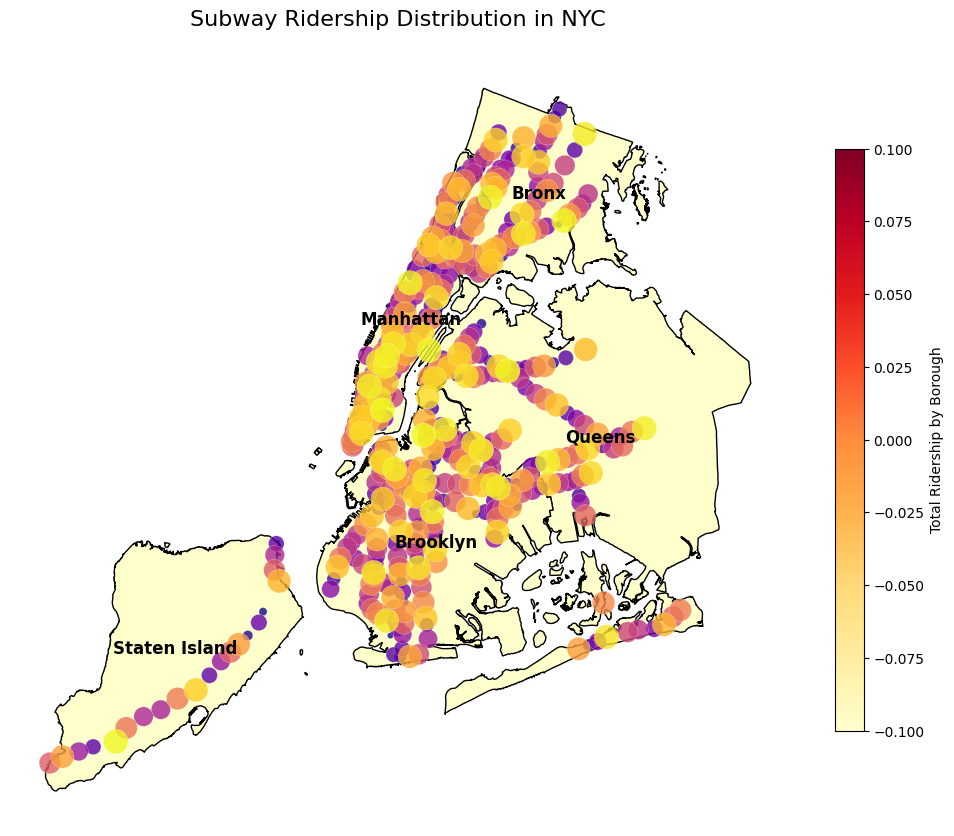

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) Build GeoDataFrame of stations (with ridership per station)
stations = dataframes['MTA_Subway_Stations']
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['GTFS Longitude'], stations['GTFS Latitude']),
    crs="EPSG:4326"
)

# — Ensure you have a 'StationRidership' column (actual or placeholder) —
# Replace this with your real per‑station ridership metric if you have it
if 'StationRidership' not in stations_gdf.columns:
    stations_gdf['StationRidership'] = (stations_gdf.index + 1) * 5000

# 2) Load borough boundaries
boroughs = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs(stations_gdf.crs)

# 3) Sum ridership by borough
boro_ridership = stations_gdf.groupby('Borough')['StationRidership'].sum().rename('TotalRidership')
boroughs = boroughs.set_index('BoroName').join(boro_ridership).fillna(0)

# 4) Plot choropleth of borough ridership
fig, ax = plt.subplots(figsize=(10,10))
boroughs.plot(
    column='TotalRidership',
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=1,
    legend=True,
    legend_kwds={'label': "Total Ridership by Borough", 'shrink':0.6},
    ax=ax
)

# 5) Overlay station bubbles sized & colored by ridership
stations_gdf.plot(
    ax=ax,
    markersize=stations_gdf['StationRidership']**0.5 / 5,
    c=stations_gdf['StationRidership'],
    cmap='plasma',
    alpha=0.8,
    edgecolor='white',
    linewidth=0.2,
    legend=True,
    legend_kwds={'label': "Station Ridership", 'shrink':0.5}
)

# 6) Labels & styling
for _, row in boroughs.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(x, y, row.name, ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_title("Subway Ridership Distribution in NYC", fontsize=16, pad=20)
ax.set_axis_off()
plt.tight_layout()
plt.show()


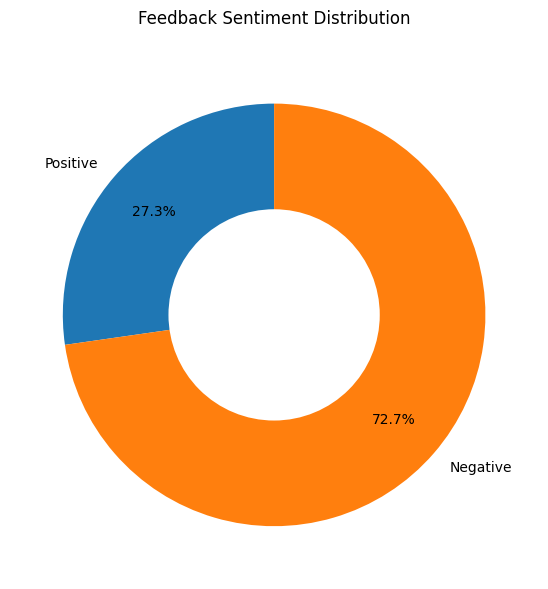

/tmp/ipykernel_23/4285925741.py:37: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  trend = sentiment_data.set_index('Date').resample('Y')['Polarity'].mean()
/tmp/ipykernel_23/4285925741.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rolling = sentiment_data.set_index('Date')['Polarity'].resample('Y').mean().rolling(3, center=True).mean()


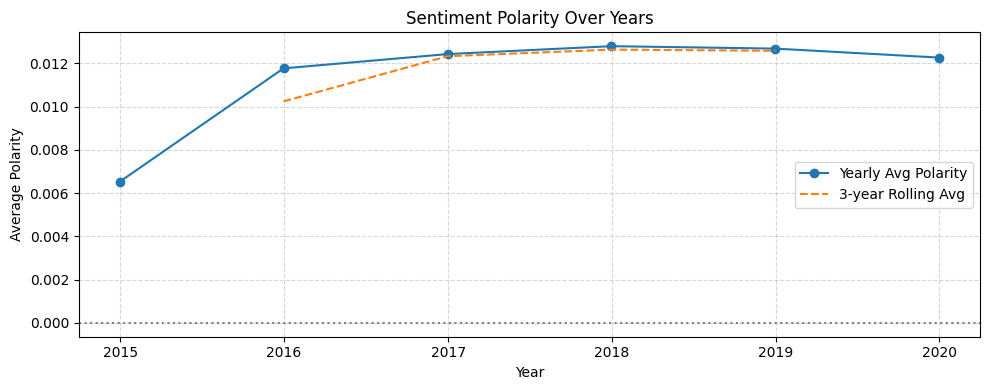

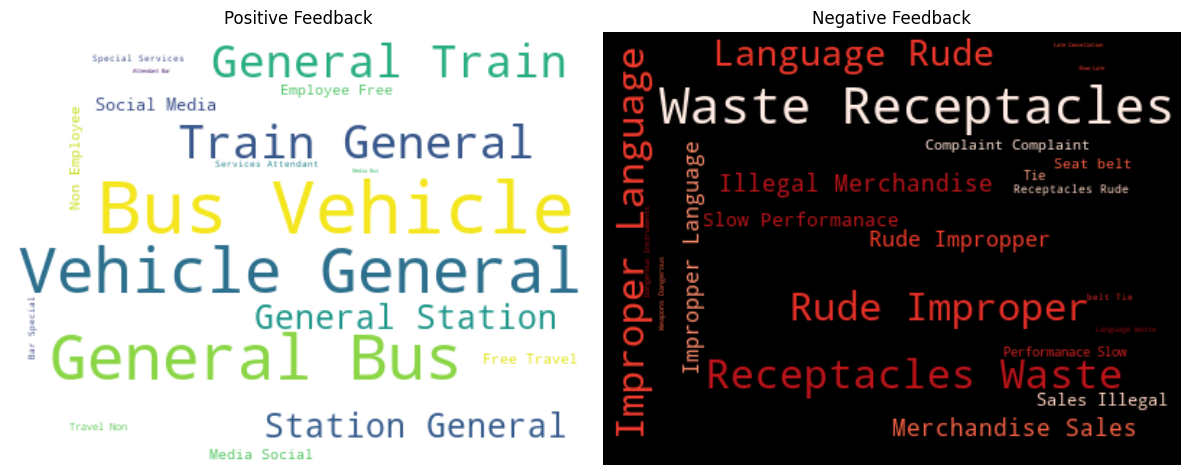

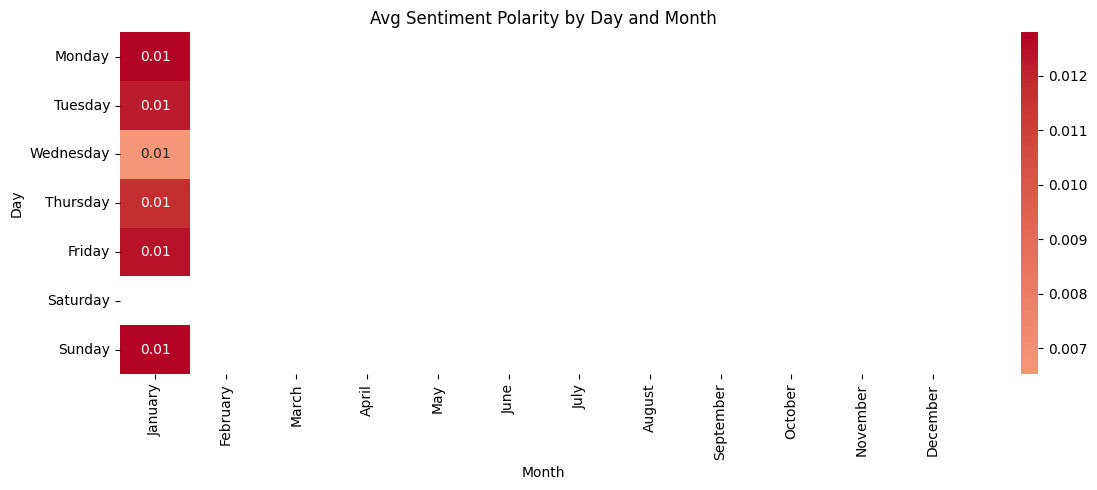

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


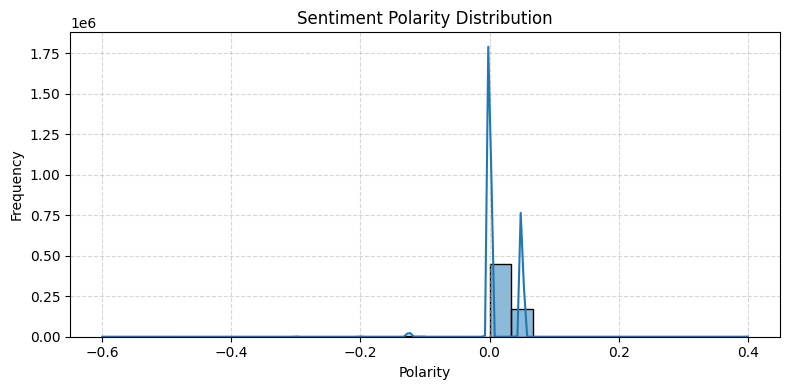

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob

# Prepare sentiment_data
feedback_data = dataframes['MTA_Customer_Feedback_Data__2014-2019'].copy()
feedback_data['Date'] = pd.to_datetime(feedback_data['Year'].astype(str) + '-01-01')
feedback_data['Feedback'] = feedback_data['Subject Detail'].fillna('')
feedback_data['Polarity'] = feedback_data['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_data = feedback_data[['Date', 'Feedback', 'Polarity']].dropna()

# Derive categories and time features
sentiment_data['Sentiment'] = pd.cut(sentiment_data['Polarity'],
                                     bins=[-1, 0, 0.0001, 1],
                                     labels=['Negative', 'Neutral', 'Positive'])
sentiment_data['Day'] = sentiment_data['Date'].dt.day_name()
sentiment_data['Month'] = sentiment_data['Date'].dt.month_name()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# 1. Donut chart for sentiment distribution
counts = sentiment_data['Sentiment'].value_counts().reindex(['Positive','Negative'])
fig, ax = plt.subplots(1, 1, figsize=(6,6))
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                  startangle=90, pctdistance=0.75)
# draw circle for donut
centre_circle = plt.Circle((0,0),0.50,fc='white')
ax.add_artist(centre_circle)
ax.set_title('Feedback Sentiment Distribution', pad=20)
plt.tight_layout()
plt.show()

# 2. Polarity over time with rolling average
trend = sentiment_data.set_index('Date').resample('Y')['Polarity'].mean()
rolling = sentiment_data.set_index('Date')['Polarity'].resample('Y').mean().rolling(3, center=True).mean()
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(trend.index, trend.values, marker='o', label='Yearly Avg Polarity')
ax.plot(rolling.index, rolling.values, linestyle='--', label='3‑year Rolling Avg')
ax.axhline(0, color='gray', linestyle=':')
ax.set_title('Sentiment Polarity Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Average Polarity')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Word clouds
pos_text = ' '.join(sentiment_data[sentiment_data['Polarity']>0]['Feedback'])
neg_text = ' '.join(sentiment_data[sentiment_data['Polarity']<0]['Feedback'])
wc_pos = WordCloud(width=400, height=300, background_color='white').generate(pos_text)
wc_neg = WordCloud(width=400, height=300, background_color='black', colormap='Reds').generate(neg_text)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(wc_pos, interpolation='bilinear'); axes[0].axis('off'); axes[0].set_title('Positive Feedback')
axes[1].imshow(wc_neg, interpolation='bilinear'); axes[1].axis('off'); axes[1].set_title('Negative Feedback')
plt.tight_layout()
plt.show()

# 4. Heatmap: average polarity by Day vs Month
pivot = sentiment_data.pivot_table(index='Day', columns='Month', values='Polarity',
                                   aggfunc='mean').reindex(index=day_order, columns=month_order)
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(pivot, annot=True, fmt=".2f", center=0, cmap='coolwarm', ax=ax)
ax.set_title('Avg Sentiment Polarity by Day and Month')
plt.tight_layout()
plt.show()

# 5. Polarity distribution histogram + KDE
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(sentiment_data['Polarity'], bins=30, kde=True, ax=ax)
ax.set_title('Sentiment Polarity Distribution')
ax.set_xlabel('Polarity'); ax.set_ylabel('Frequency')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Recommendations based on findings
 
- **Enhance Communication During Disruptions**: Improve real-time alerts and provide clearer updates.
- **Station Amenities**: Address common issues such as cleanliness, seating, and accessibility.
- **Service Reliability**: Focus on addressing frequent delays and improving transit schedules.

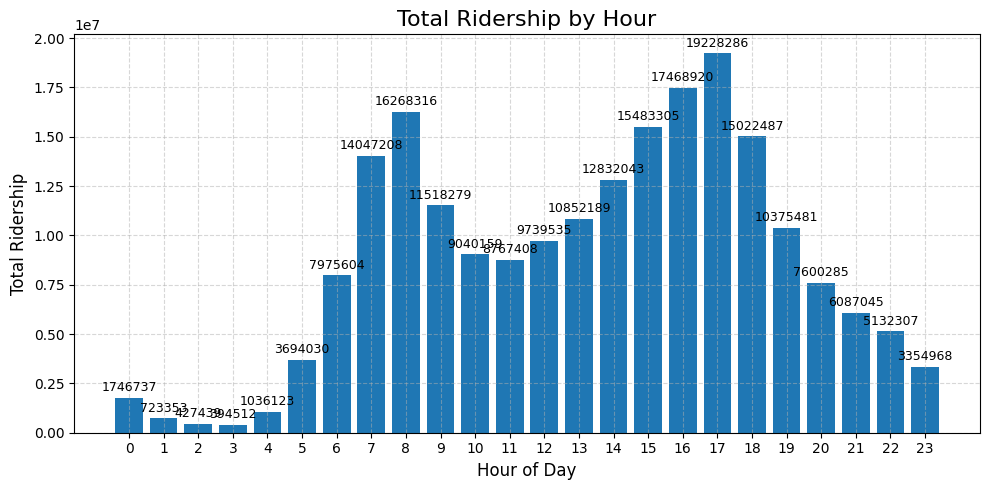

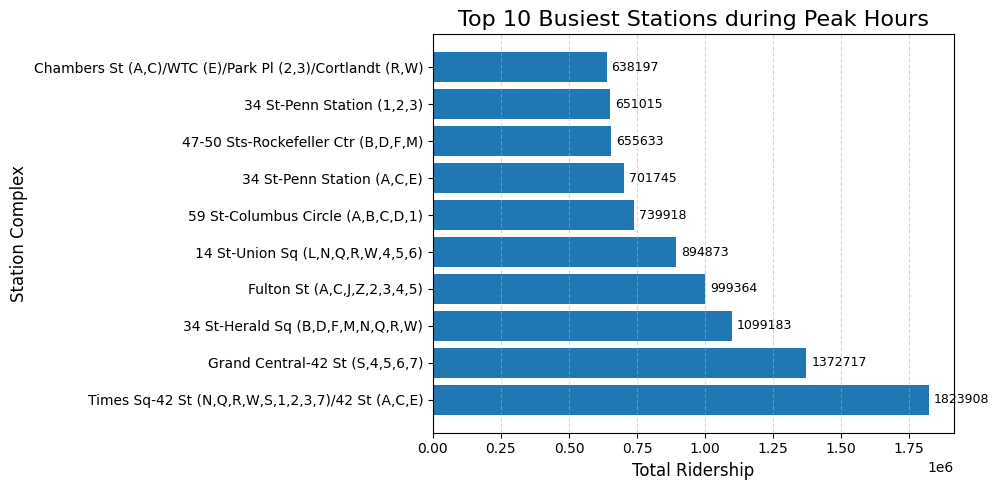

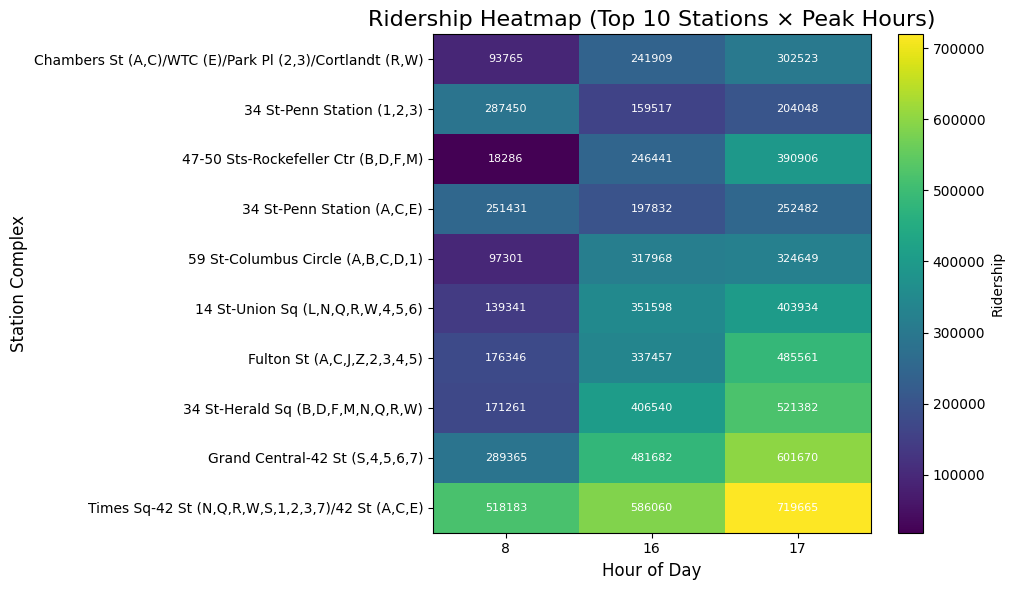

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load and preprocess
hourly_data = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020'].copy()
hourly_data['transit_timestamp'] = pd.to_datetime(hourly_data['transit_timestamp'])
hourly_data['Hour'] = hourly_data['transit_timestamp'].dt.hour
hourly_data['Date'] = hourly_data['transit_timestamp'].dt.date

# Identify peak hours
peak_hours = hourly_data.groupby('Hour')['ridership'].sum().sort_values(ascending=False)
top_3_hours = peak_hours.head(3)

# Identify busiest stations during those hours
peak_hour_data = hourly_data[hourly_data['Hour'].isin(top_3_hours.index)]
top_stations = peak_hour_data.groupby('station_complex')['ridership'].sum().sort_values(ascending=False).head(10)

# Prepare heatmap data
heatmap_data = peak_hour_data.pivot_table(
    values='ridership', index='station_complex', columns='Hour', aggfunc='sum'
).loc[top_stations.index, sorted(top_3_hours.index)]

# 2) Plot: Total ridership by hour
plt.figure(figsize=(10, 5))
bars = plt.bar(peak_hours.index, peak_hours.values)
for h, v in zip(peak_hours.index, peak_hours.values):
    plt.text(h, v + peak_hours.values.max()*0.01, f'{v:.0f}', ha='center', va='bottom', fontsize=9)
plt.title('Total Ridership by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Ridership', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3) Plot: Top 10 busiest stations during peak hours
plt.figure(figsize=(10, 5))
y_pos = range(len(top_stations))
plt.barh(y_pos, top_stations.values)
plt.yticks(y_pos, top_stations.index)
for i, v in enumerate(top_stations.values):
    plt.text(v + top_stations.values.max()*0.01, i, f'{v:.0f}', va='center', fontsize=9)
plt.title('Top 10 Busiest Stations during Peak Hours', fontsize=16)
plt.xlabel('Total Ridership', fontsize=12)
plt.ylabel('Station Complex', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4) Plot: Heatmap of ridership for top stations across peak hours
plt.figure(figsize=(10, 6))
# use imshow for heatmap
arr = heatmap_data.values
plt.imshow(arr, aspect='auto', origin='lower')
plt.colorbar(label='Ridership')
plt.xticks(range(arr.shape[1]), heatmap_data.columns)
plt.yticks(range(arr.shape[0]), heatmap_data.index)
# annotate each cell
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        plt.text(j, i, f'{int(arr[i,j])}', ha='center', va='center', fontsize=8, color='white')
plt.title('Ridership Heatmap (Top 10 Stations × Peak Hours)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Station Complex', fontsize=12)
plt.tight_layout()
plt.show()


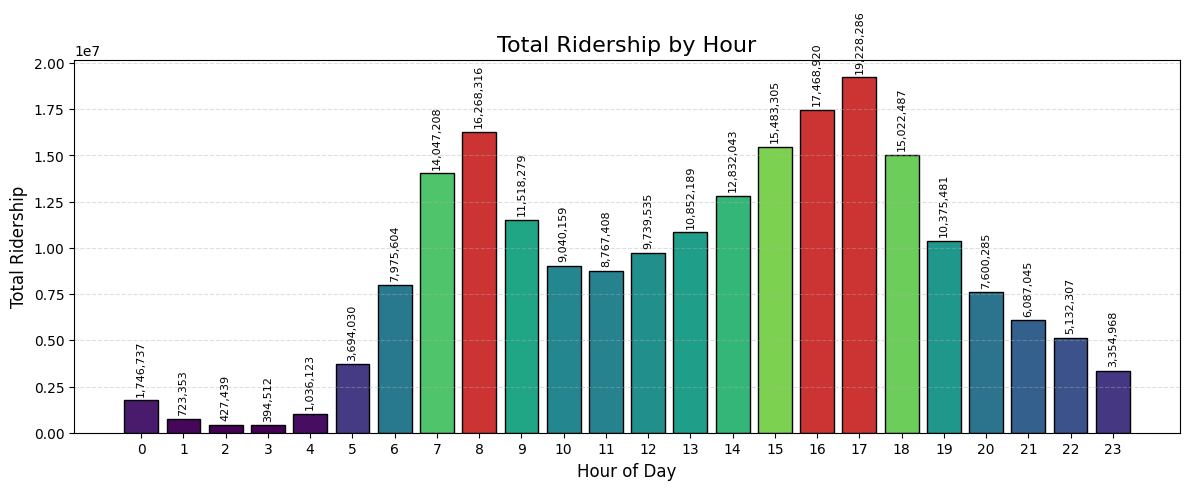

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# assume peak_hours is a pd.Series indexed by Hour with total ridership values
# e.g.:
# peak_hours = hourly_data.groupby('Hour')['ridership'].sum().sort_values(ascending=False)

# Sort by hour to plot in time order
peak_hours = peak_hours.sort_index()
hours = peak_hours.index.values
values = peak_hours.values

# Build a color array: use viridis, but highlight top3 in crimson
norm = (values - values.min()) / (values.max() - values.min())
base_colors = plt.cm.viridis(norm)
# find top3 indices
top3 = np.argsort(values)[-3:]
for i in top3:
    base_colors[i] = (0.8, 0.2, 0.2, 1.0)  # rgba for a red highlight

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(hours, values, color=base_colors, edgecolor='black')

# add labels with bar_label (matplotlib ≥3.4)
ax.bar_label(bars,
             labels=[f"{int(v):,}" for v in values],
             padding=3,
             rotation=90,
             fontsize=8,
             color='black')

ax.set_title('Total Ridership by Hour', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Total Ridership', fontsize=12)
ax.set_xticks(hours)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


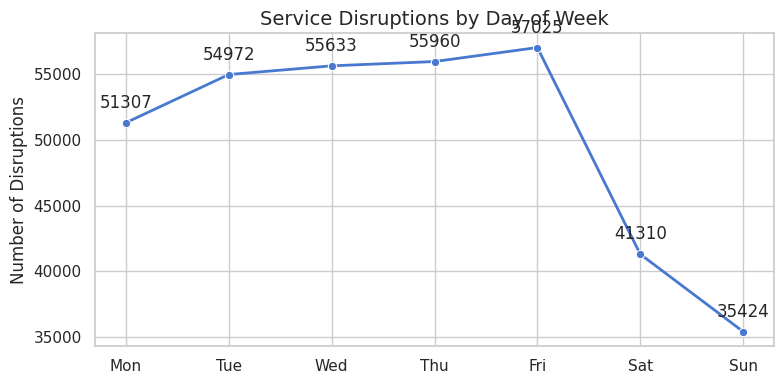

Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.56      0.21      0.31     34774
           1       0.70      0.92      0.80     70716

    accuracy                           0.69    105490
   macro avg       0.63      0.57      0.55    105490
weighted avg       0.66      0.69      0.64    105490



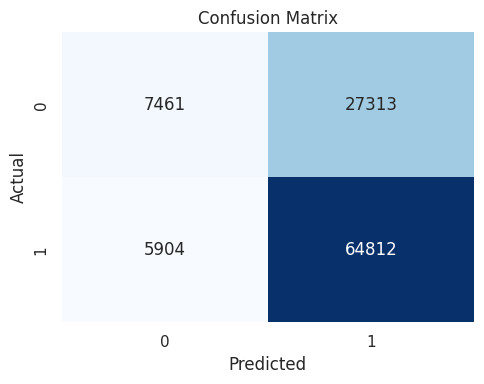

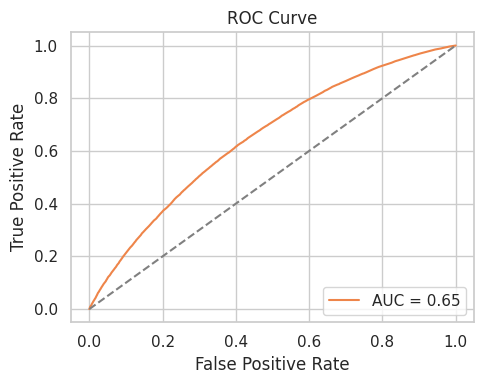

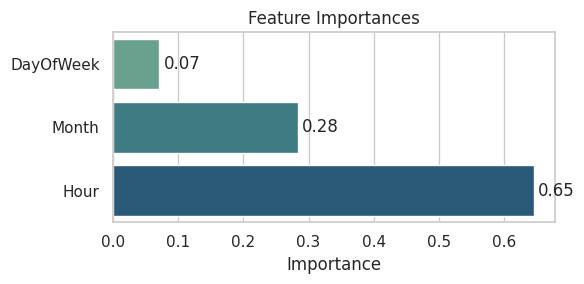

### Recommendations ###
- Focus on peak hours (e.g., Hours with highest disruption counts).
- Allocate maintenance on days with historically high delays.
- Enhance customer alerts leveraging predicted delay windows.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, auc
)

# Use a clean seaborn style
sns.set_theme(style="whitegrid", palette="muted")

# 1) Load & preprocess
alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020'].copy()
alerts['Date'] = pd.to_datetime(alerts['Date'])
alerts['Year'] = alerts['Date'].dt.year
alerts['Month'] = alerts['Date'].dt.month
alerts['DayOfWeek'] = alerts['Date'].dt.dayofweek
alerts['Hour'] = alerts['Date'].dt.hour

# 2) Disruptions by DayOfWeek
day_map = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
disruptions = (
    alerts.groupby('DayOfWeek')
    .size()
    .reindex(range(7), fill_value=0)
    .rename_axis('DayOfWeek')
    .reset_index(name='Count')
)
disruptions['Day'] = disruptions['DayOfWeek'].map(lambda x: day_map[x])

plt.figure(figsize=(8,4))
ax = sns.lineplot(
    data=disruptions, x='Day', y='Count',
    marker='o', linewidth=2, color='C0'
)
for x, y in zip(disruptions['Day'], disruptions['Count']):
    ax.text(x, y + disruptions['Count'].max()*0.02, f"{y}", ha='center')
ax.set_title("Service Disruptions by Day of Week", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Number of Disruptions")
plt.tight_layout()
plt.show()

# 3) Train/test split & model
features = alerts[['Month', 'DayOfWeek', 'Hour']]
target = alerts['Status Label'].str.contains('delay', case=False).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

# 4) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5) ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='C1')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 6) Feature importance (fixed palette name)
importances = pd.Series(model.feature_importances_, index=features.columns).sort_values()
plt.figure(figsize=(6,3))
sns.barplot(x=importances.values, y=importances.index, palette="crest")
for i, v in enumerate(importances.values):
    plt.text(v + importances.max()*0.01, i, f"{v:.2f}", va='center')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 7) Recommendations
print("### Recommendations ###")
print("- Focus on peak hours (e.g., Hours with highest disruption counts).")
print("- Allocate maintenance on days with historically high delays.")
print("- Enhance customer alerts leveraging predicted delay windows.")


/tmp/ipykernel_23/2314334909.py:35: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  boroughs = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs(stations_gdf.crs)


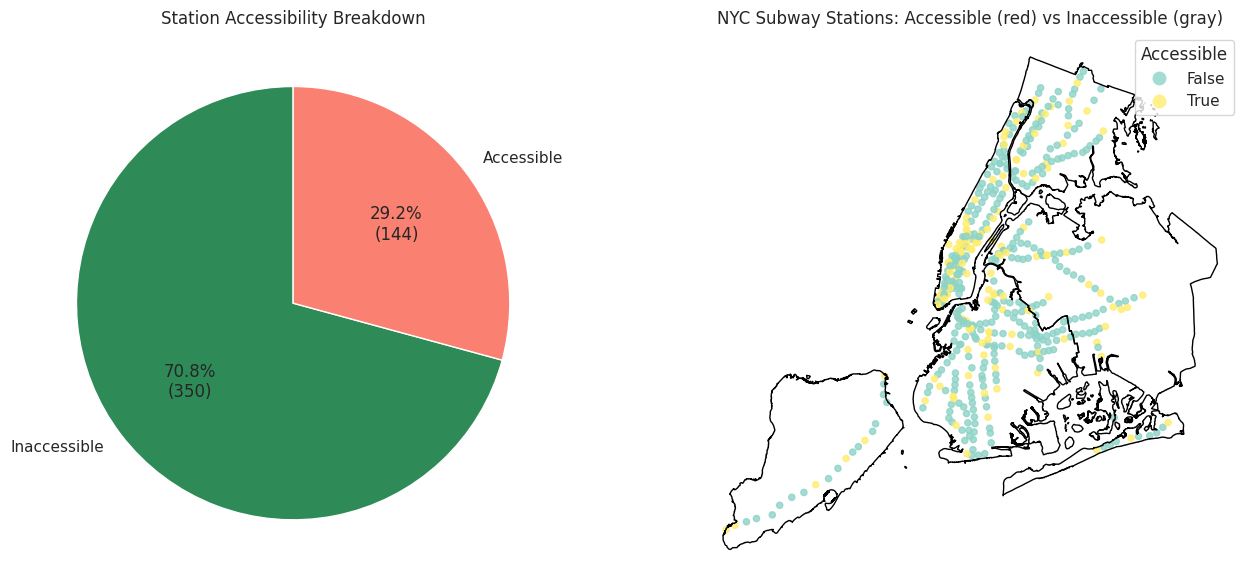

### Recommendations ###
1. Prioritize elevator installs at the highest-traffic inaccessible stations.
2. Add ramps and tactile signage at medium-traffic locations.
3. Use spatial gaps in coverage to plan new accessible routes.


In [89]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style
sns.set_theme(style="whitegrid")

# 1) Load and prepare station data
stations = dataframes['MTA_Subway_Stations'].copy()
stations = stations.dropna(subset=['GTFS Latitude','GTFS Longitude'])
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['GTFS Longitude'], stations['GTFS Latitude']),
    crs="EPSG:4326"
)

# 2) Accessibility summary
stations_gdf['Accessible'] = stations_gdf['ADA'] == 1
counts = stations_gdf['Accessible'].value_counts().rename({True:'Accessible', False:'Inaccessible'})
total = counts.sum()

# 3) Pie chart of accessibility
fig, ax = plt.subplots(1,2, figsize=(14,6))
counts.plot.pie(
    autopct=lambda p: f"{p:.1f}%\n({int(p*total/100):d})",
    colors=['seagreen','salmon'],
    startangle=90,
    ax=ax[0]
)
ax[0].set_ylabel('')
ax[0].set_title("Station Accessibility Breakdown")

# 4) Borough boundaries for context
boroughs = gpd.read_file(gpd.datasets.get_path('nybb')).to_crs(stations_gdf.crs)
boroughs.boundary.plot(ax=ax[1], edgecolor='black', linewidth=1)

# 5) Plot stations: accessible vs inaccessible
stations_gdf.plot(
    ax=ax[1], 
    column='Accessible', 
    categorical=True,
    legend=True,
    markersize=20,
    cmap='Set3',
    alpha=0.8,
    legend_kwds={'title':'Accessible'}
)
ax[1].set_title("NYC Subway Stations: Accessible (red) vs Inaccessible (gray)")
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

# 6) Top 10 high-traffic inaccessible stations, if ridership exists
if 'Ridership' in stations_gdf.columns:
    top_inacc = (
        stations_gdf[~stations_gdf['Accessible']]
        .nlargest(10, 'Ridership')
        .set_index('Stop Name')['Ridership']
    )
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_inacc.values, y=top_inacc.index, palette='Reds_r')
    plt.title("Top 10 High-Traffic Inaccessible Stations")
    plt.xlabel("Ridership")
    plt.ylabel("Station")
    plt.tight_layout()
    plt.show()

# 7) Recommendations
print("### Recommendations ###")
print("1. Prioritize elevator installs at the highest-traffic inaccessible stations.")
print("2. Add ramps and tactile signage at medium-traffic locations.")
print("3. Use spatial gaps in coverage to plan new accessible routes.")
